In [7]:
import pandas as pd
xls = pd.ExcelFile('CompanyDetails.xlsx')
overview = pd.read_excel(xls, 'Overview')
comp = pd.read_excel(xls, 'Financials')
overview.head()#returns first 5 rows
overview.head(2)
overview.tail()#returns last 5 rows
overview.tail(2)
overview.shape# shape can be done on a 2d structure not on the whole excel file
overview.describe()
df = overview.join(comp, lsuffix='', rsuffix='_right')
df.head(1)
df.describe()#includes numeical fields
df.describe(include="all")#incudes all fields
df = df.drop(['ID_right' , 'Name_right'], axis=1)#remove unwanted fields
df.head(1)
df.columns
df.isnull().sum()
df.columns
df = df.drop(['City' , 'Zip Code' , '2004 Growth%','2003 Revenue','2003 Expenses'], axis=1)
df.columns
df["Year Founded"]=df["Year Founded"].fillna(df["Year Founded"].mean)
df.isnull().sum()
df = df.replace("Data/Technology", "Data/Technology")
df.head()
df.to_csv('Lab1_output1.csv')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


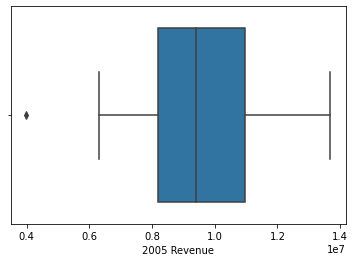

In [34]:
import seaborn as sns
df_copy = df
df_copy.groupby(['Industry']).mean()["2005 Growth%"]["Data/Technology"]
df_copy.groupby(['Industry']).mean()["2005 Growth%"]
x = df_copy.loc[df_copy["Industry"] == "Education", "2005 Revenue"]
x=df_copy.loc[df_copy["Industry"] == "Education","2005 Revenue"]
ax = sns.boxplot(x)


In [35]:
df_copy.groupby(['Industry']).count()["ID"]

Industry
Aerospace and Defense         1
Business & Legal Services    45
Data/Technology              97
Data/Technology,              1
Education                    19
Energy                       28
Environment & Weather        12
Finance & Investment         75
Food & Agriculture            6
Geospatial/Mapping           30
Governance                   43
Healthcare                   40
Housing/Real Estate          20
Housing/Real Estate,          1
Insurance                    11
Lifestyle & Consumer         25
Media                         1
Research & Consulting        28
Scientific Research          17
Software                      1
Transportation               28
Name: ID, dtype: int64

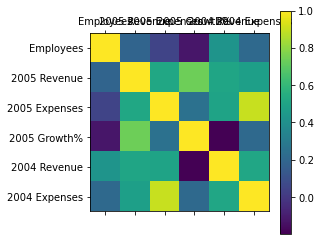

In [48]:
import matplotlib.pyplot as plt
ch = df_copy.groupby(['Industry']).mean()
ch.columns
coordata = ch.drop(['ID'],axis=1)
coordata.corr()
plt.matshow(coordata.corr())
plt.xticks(range(len(coordata.columns)), coordata.columns)
plt.yticks(range(len(coordata.columns)), coordata.columns)
plt.colorbar()
plt.show()

<AxesSubplot:>

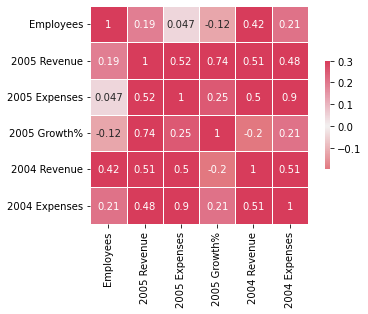

In [56]:
corr = coordata.corr()
cmap = sns.diverging_palette(10, 5, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

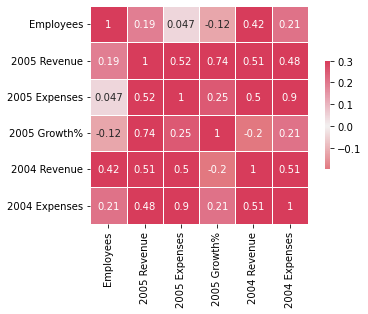